In [1]:
import os,sys,inspect
os.chdir('../')


from simulator import * 
import preprocessing.deconvolution as deconv
import preprocessing.autoencoders 
import detector.naive_detector as naive_detector
import utils

import numpy as np
import matplotlib.pyplot as plt


In [2]:
sim = simulator(100, 1)
print(sim)

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1


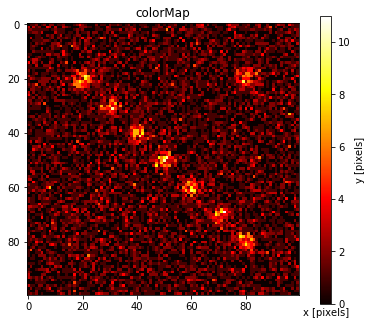

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 8
photons_in_background is set to 1 by default
SNR: 5
x0: [20. 30. 40. 50. 60. 70. 80. 80.]
y0: [20. 30. 40. 50. 60. 70. 80. 20.]


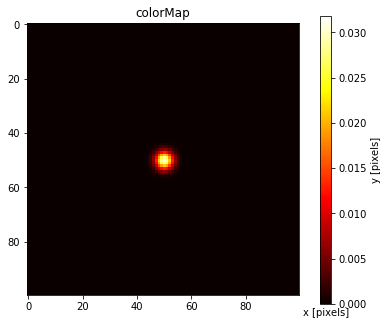

In [3]:
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

raw_image = sim.create_simulation_from_SNR(x0, y0, 5, verbose=True)
kernel = utils.gaussian_kernel(100, sim.variance, verbose=True)





Preprocessing:
------------------


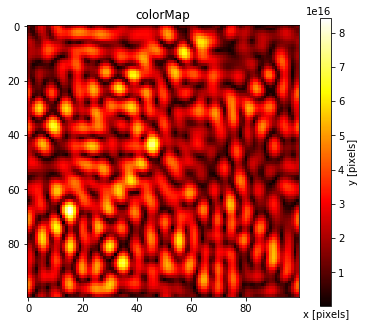

In [4]:
inv_filtered_image = deconv.inv_filter(raw_image, kernel)
visualize(inv_filtered_image)

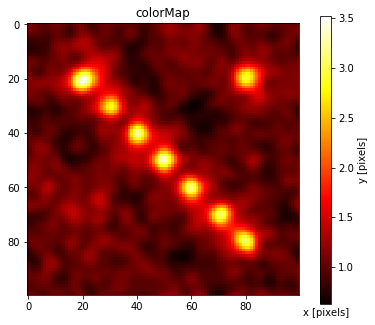

In [5]:
regularized_filtered_image = deconv.regularized_filter(raw_image, kernel, alpha=1)
visualize(regularized_filtered_image)

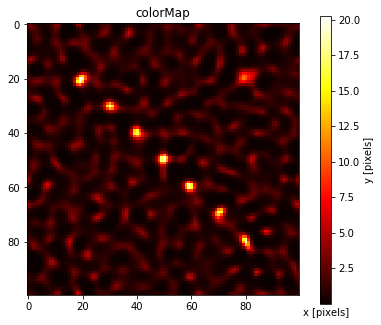

(100, 100)


In [6]:
rl_filtered_image = deconv.richardson_lucy_deconv(raw_image, kernel, 30)
visualize(rl_filtered_image)
print(rl_filtered_image.shape)

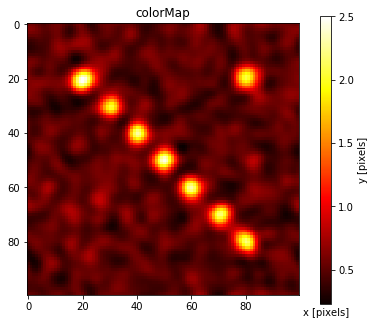

In [7]:
wiener_filtered_image = deconv.wiener_deconv(raw_image, kernel)
visualize(wiener_filtered_image)

Detecting Atoms Using the Filtered Image
-------------------------------

1. make a around the atom and then apply the naive classifier\\
2. do a binary classifier on every pixel

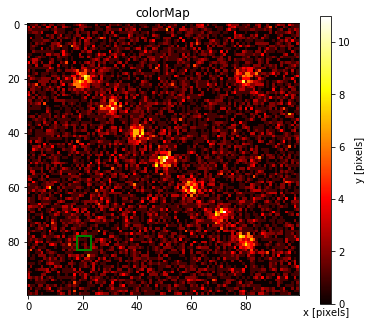

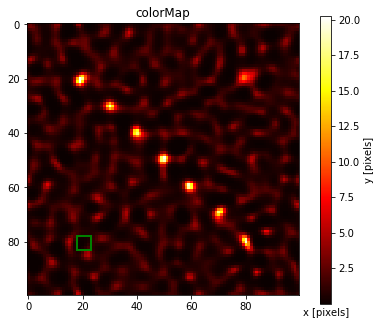

In [19]:
clf = naive_detector.detector(100, 20, 80, 5, 5)
clf.visualize_data(raw_image)
clf.visualize_data(rl_filtered_image)

In [13]:
SNR = np.linspace(2, 20, 10)
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

data_tr, labels_tr = utils.generate_data_labels(100, x0, y0, SNR, 2000)
data_test, labels_test = utils.generate_data_labels(100, x0, y0, SNR, 1000)
print(data_tr.shape, labels_tr.shape)
print(data_test.shape, labels_test.shape)


time used: 86.91742753982544
time used: 41.13893222808838
(10, 2000, 100, 100) (10, 2000)
(10, 1000, 100, 100) (10, 1000)


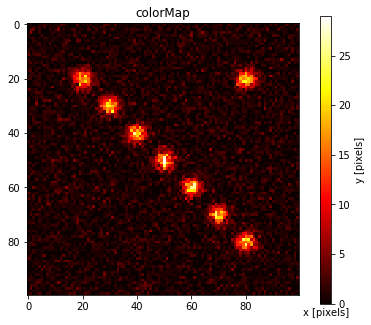

In [14]:
visualize(data_tr[-1, 1, :, :])

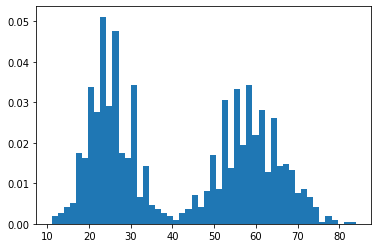

Training accuracy: 0.9985074626865672
Validation accuracy: 1.0
Threshold: 39.388888888888886
SNR: 2.0


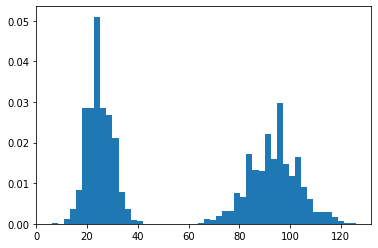

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 46.67796610169491
SNR: 4.0


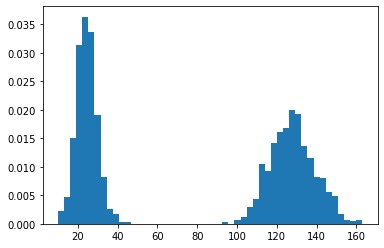

Training accuracy: 0.994776119402985
Validation accuracy: 1.0
Threshold: 38.18421052631579
SNR: 6.0


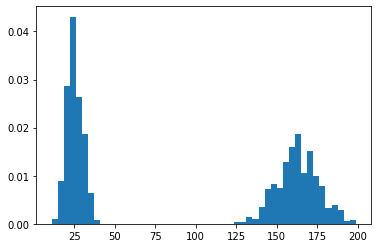

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 39.3010752688172
SNR: 8.0


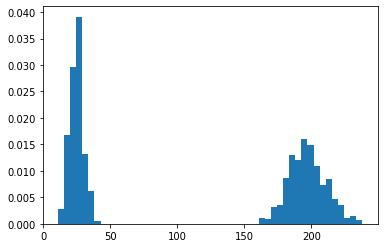

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 43.14159292035398
SNR: 10.0


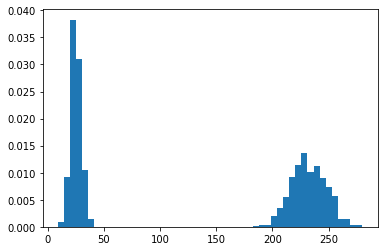

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 41.11851851851852
SNR: 12.0


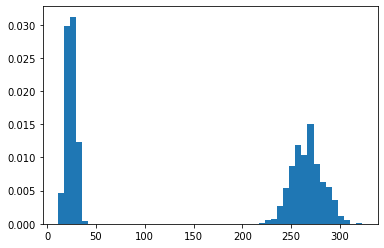

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 39.18064516129032
SNR: 14.0


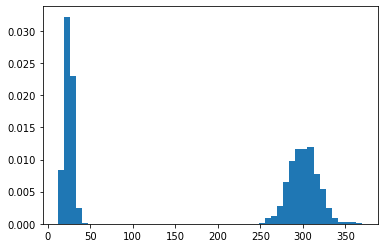

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 40.157303370786515
SNR: 16.0


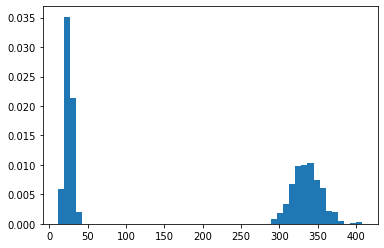

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 49.0959595959596
SNR: 18.0


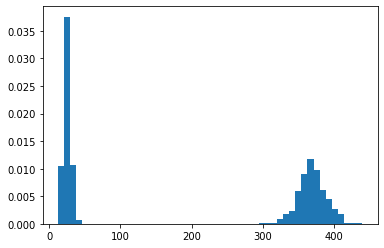

Training accuracy: 0.9970149253731343
Validation accuracy: 1.0
Threshold: 38.122065727699535
SNR: 20.0


In [20]:
accuracies_tr, accuracies_val, thresholds = [], [], []
for i in range(data_tr.shape[0]):
    d_tr, l_tr = data_tr[i], labels_tr[i]
    accuracy_tr, accuracy_val, thresh = clf.train(d_tr, l_tr, verbose=True)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)
    thresholds.append(thresh)
    print(f"SNR: {SNR[i]}")


In [11]:
labels_pred = clf.predict(data_test)